# White Blood Cell Image Classification
### By [Anthony Medina](https://www.linkedin.com/in/anthony-medina-math/)

# Wrangling and EDA Notebook
1. Notebook Objectives
2. Imports
3. Initial Data Loading
4. Initial Exploration
5. Constructing a more useful Data Frame
    * Including cell type, file path, image shape, and image array
6. Data Exploration
    * What does a cell of each type look like?
    * What does the distribution of cells look like?
    * What color scale are we using?
    * Are all of the images shaped the same?
7. Constructing an even more useful Data Frame
    * Encoding cell types
    * Flattening arrays
    * Converting arrays to floats and rescaling
8. Constructing a Data Frame for data classification once the model is finished.
9. Exporting Data to cleaned to the cleaned data folder
10. Next Steps

### 1. Notebook Objectives

The purpose of this notebook is to load the raw data, explore it and get it into a state where it can be modeled.

### 2. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tqdm

### 3. Data Loading

In [2]:
cell_data = pd.read_csv('../raw_data/dataset2-master/labels.csv')

In [3]:
cell_data.head()

,Unnamed: 0,Image,Category
0,NaN,0,NEUTROPHIL
1,NaN,1,NEUTROPHIL
2,NaN,2,NEUTROPHIL
3,NaN,3,NEUTROPHIL
4,NaN,4,NEUTROPHIL


### 4. Initial Exploration

In [4]:
cell_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Image       411 non-null    int64  
 2   Category    367 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.8+ KB


It looks like the CSV contains labels for the test data set that came with the actual data.

I'm going to construct my own CSV with the labels and the images.

### 5. Constructing a more useful Data Frame
* Including cell type, file path, image shape, and image array

In [5]:
# First I'll make a data frame, fill it with the values that I need and save it as my new working CSV.

column_names = ['cell_class', 'image_path', 'image_shape', 'image_array']

# Create a blank DataFrame with column names
cell_data = pd.DataFrame(columns=column_names)


In [6]:
# Populating the data frame from the 4 different types of images
cell_names = ['neutrophil', 'monocyte', 'lymphocyte', 'eosinophil']
# Specify the directory path

# Loop through files in the directory
for cell_name in cell_names:
    directory_path = '../raw_data/organized_data_set/images/' + cell_name
    for filename in os.listdir(directory_path):
        if os.path.isfile(os.path.join(directory_path, filename)):
            file_path = os.path.abspath(os.path.join(directory_path, filename))
            image = mpimg.imread(file_path)
            new_entry = {"cell_class": cell_name, 'image_path': file_path, 'image_shape': image.shape, 'image_array': np.array(image)}
            cell_data.loc[len(cell_data)] = new_entry

### 6. Data Exploration
* What does our new data frame look like?
* What does a cell of each type look like?
* What does the distribution of cells look like?
* What color scale are we using?
* Are all of the images shaped the same?

In [7]:
cell_data.head()

,cell_class,image_path,image_shape,image_array
0,neutrophil,/Users/MacBookPro-II/Documents/GitHub/Blood_Cl...,"(240, 320, 3)","[[[3, 0, 0], [8, 4, 3], [3, 0, 0], [4, 0, 0], ..."
1,neutrophil,/Users/MacBookPro-II/Documents/GitHub/Blood_Cl...,"(240, 320, 3)","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,neutrophil,/Users/MacBookPro-II/Documents/GitHub/Blood_Cl...,"(240, 320, 3)","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,neutrophil,/Users/MacBookPro-II/Documents/GitHub/Blood_Cl...,"(240, 320, 3)","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,neutrophil,/Users/MacBookPro-II/Documents/GitHub/Blood_Cl...,"(240, 320, 3)","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [8]:
cell_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12437 entries, 0 to 12436
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cell_class   12437 non-null  object
 1   image_path   12437 non-null  object
 2   image_shape  12437 non-null  object
 3   image_array  12437 non-null  object
dtypes: object(4)
memory usage: 485.8+ KB


In [9]:
# Let's grab an example cell of each type and take a look at them.

neutrophil_path = cell_data.loc[100][1]
monocyte_path = cell_data.loc[3384][1]
lymphocyte_path = cell_data.loc[7324][1]
eosinophil_path = cell_data.loc[10123][1]

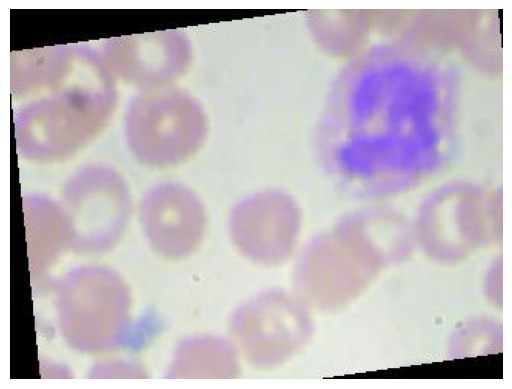

Image Data Shape: (240, 320, 3)


In [10]:
# Neutrophil

# Load the image
image = mpimg.imread(neutrophil_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axes
plt.show()
print("Image Data Shape:", image.shape)

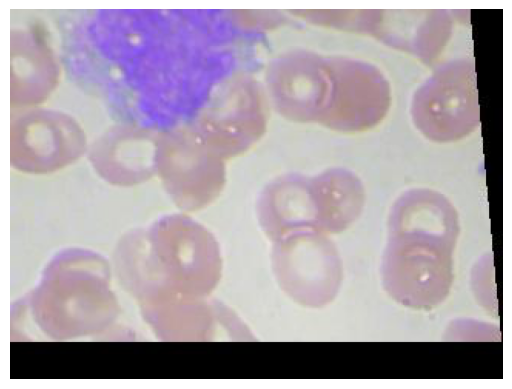

Image Data Shape: (240, 320, 3)


In [11]:
# Monocyte

# Load the image
image = mpimg.imread(monocyte_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axes
plt.show()
print("Image Data Shape:", image.shape)

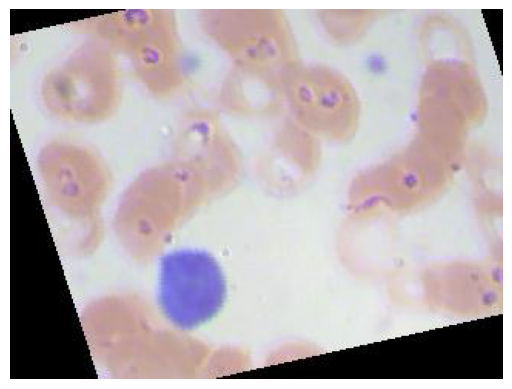

Image Data Shape: (240, 320, 3)


In [12]:
# Lymphocyte

# Load the image
image = mpimg.imread(lymphocyte_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axes
plt.show()
print("Image Data Shape:", image.shape)

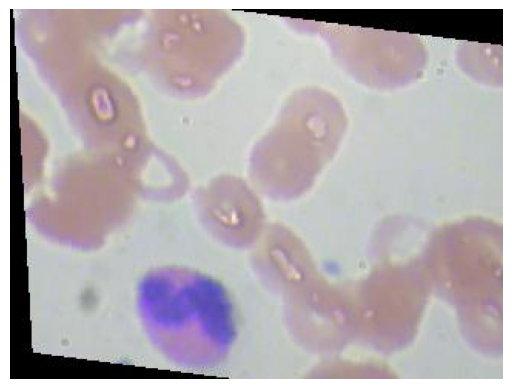

Image Data Shape: (240, 320, 3)


In [13]:
# Eosinophil

# Load the image
image = mpimg.imread(eosinophil_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axes
plt.show()
print("Image Data Shape:", image.shape)

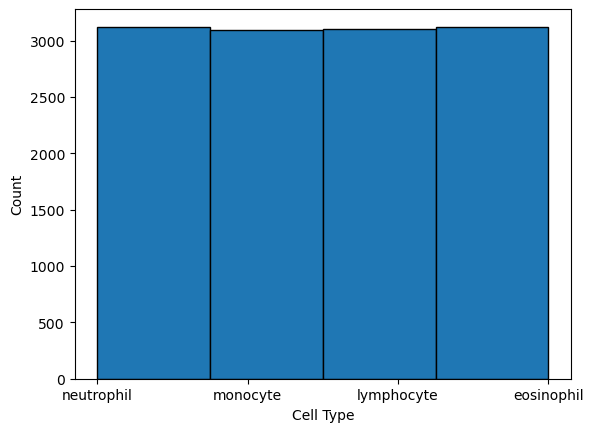

In [14]:
# Let's see the distribution of cell types
_ = plt.hist(cell_data['cell_class'], bins=4, edgecolor='k')
_ = plt.xlabel('Cell Type')
_ = plt.ylabel('Count')
plt.show()

In [16]:
# Are all of the images the same size?
cell_data["image_shape"].nunique()

1

### All of the cell images are the same size. That will make reshaping, and resizing a lot easier.

### Let's see what sort of color scale they're using.

In [17]:
unique_values, counts = np.unique(cell_data.loc[100][3], return_counts=True)

# Create a dictionary to represent value counts
value_counts = dict(zip(unique_values, counts))

print("Value Counts:", value_counts)

Value Counts: {0: 12500, 1: 1099, 2: 659, 3: 392, 4: 430, 5: 244, 6: 228, 7: 233, 8: 162, 9: 152, 10: 112, 11: 113, 12: 109, 13: 66, 14: 76, 15: 65, 16: 55, 17: 52, 18: 50, 19: 33, 20: 25, 21: 23, 22: 22, 23: 23, 24: 14, 25: 10, 26: 11, 27: 9, 28: 8, 29: 2, 30: 5, 31: 2, 32: 2, 33: 6, 35: 1, 36: 1, 37: 4, 38: 1, 41: 1, 44: 1, 79: 5, 80: 8, 81: 4, 82: 9, 83: 9, 84: 14, 85: 20, 86: 23, 87: 20, 88: 29, 89: 32, 90: 34, 91: 44, 92: 53, 93: 80, 94: 86, 95: 88, 96: 100, 97: 121, 98: 119, 99: 119, 100: 116, 101: 112, 102: 121, 103: 117, 104: 112, 105: 78, 106: 90, 107: 87, 108: 73, 109: 88, 110: 75, 111: 77, 112: 77, 113: 84, 114: 61, 115: 40, 116: 57, 117: 50, 118: 58, 119: 56, 120: 54, 121: 51, 122: 51, 123: 50, 124: 60, 125: 59, 126: 65, 127: 68, 128: 81, 129: 93, 130: 77, 131: 82, 132: 85, 133: 107, 134: 71, 135: 89, 136: 118, 137: 135, 138: 165, 139: 203, 140: 162, 141: 180, 142: 193, 143: 230, 144: 246, 145: 218, 146: 201, 147: 234, 148: 273, 149: 271, 150: 312, 151: 363, 152: 346, 153: 

In [17]:
# Let's see what the min and max values are for each of these cells.
cell_names = ['neutrophil', 'monocyte', 'lymphocyte', 'eosinophil']
cell_number = [100, 3384, 7324, 10123]
for i in range(4):
    array = cell_data.loc[cell_number[i]][3]
    min_value = np.min(array)
    max_value = np.max(array)
    print(cell_names[i], "Minimum Value:", min_value, "Maximum Value:", max_value)


neutrophil Minimum Value: 0 Maximum Value: 255
monocyte Minimum Value: 0 Maximum Value: 249
lymphocyte Minimum Value: 0 Maximum Value: 255
eosinophil Minimum Value: 0 Maximum Value: 255


### It looks like everything is the standard unit 8 data type.

In [18]:
cell_arrays = cell_data['image_array']

In [19]:
print(cell_arrays[0].shape)

(240, 320, 3)


In [20]:
print(cell_arrays.shape)

(12437,)


In [21]:
single_cell = cell_arrays[350]

In [22]:
# single_cell = single_cell.flatten()

In [23]:
print(single_cell.dtype)

uint8


In [24]:
single_cell = single_cell.astype('float32')

In [25]:
print(single_cell)

[[[ 0.  0.  0.]
  [ 9.  9.  7.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 8.  8.  6.]
  [ 3.  3.  1.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 4.  4.  2.]
  [ 0.  0.  0.]
  [16. 16. 14.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 ...

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]


In [26]:
single_cell /= 255.0

In [27]:
print(single_cell)

[[[0.         0.         0.        ]
  [0.03529412 0.03529412 0.02745098]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.03137255 0.03137255 0.02352941]
  [0.01176471 0.01176471 0.00392157]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.01568628 0.01568628 0.00784314]
  [0.         0.         0.        ]
  [0.0627451  0.0627451  0.05490196]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


### 7. Constructing an even more useful Data Frame
* Encoding cell types
* Flattening arrays
* Converting arrays to floats and rescaling

In [28]:
# Cell Type Data Types Data Frame

data = {
    "key": [0,1,2,3],
    "names": ['neutrophil', 'monocyte', 'lymphocyte', 'eosinophil']
}
cell_key = pd.DataFrame(data)


cell_key.head()

,key,names
0,0,neutrophil
1,1,monocyte
2,2,lymphocyte
3,3,eosinophil


In [33]:
# New Array that will contain the final values I need to save for modeling.

column_names = ['cell_name', 'image_array']

# Create a blank DataFrame with column names
cleaned_data = pd.DataFrame(columns=column_names)

# Populating the data frame from the 4 different types of images
cell_names = ['neutrophil', 'monocyte', 'lymphocyte', 'eosinophil']

for index, cell_name in enumerate(cell_names):
    print(index, cell_name)
    directory_path = '../raw_data/organized_data_set/images/' + cell_name
    for filename in os.listdir(directory_path):
        if os.path.isfile(os.path.join(directory_path, filename)):
            file_path = os.path.abspath(os.path.join(directory_path, filename))
            image = mpimg.imread(file_path) # First it's an image
            first_array = np.array(image) # Then it's an array
#            reshaped_array = first_array.flatten() # Now it's a flat array
            float_array = first_array.astype('float32') # Now it's an array of floats
            rescaled_array = float_array / 255.0 # Rescaling the float
            new_entry = {"cell_name": cell_name, 'image_array': rescaled_array}
            cleaned_data.loc[len(cleaned_data)] = new_entry

0 neutrophil
1 monocyte
2 lymphocyte
3 eosinophil


In [34]:
cleaned_data.head()

,cell_name,image_array
0,neutrophil,"[[[0.011764706, 0.0, 0.0], [0.03137255, 0.0156..."
1,neutrophil,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
2,neutrophil,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
3,neutrophil,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
4,neutrophil,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."


### 8. Constructing a Data Frame for data classification once the model is finished.

In [36]:
# Final Array for testing once the model is finished.

column_names = ['cell_name', 'image_array']

# Create a blank DataFrame with column names
final_test = pd.DataFrame(columns=column_names)

# Populating the data frame from the 4 different types of images
cell_names = ['neutrophil', 'monocyte', 'lymphocyte', 'eosinophil']

for index, cell_name in enumerate(cell_names):
    print(index, cell_name)
    directory_path = '../raw_data/organized_data_set/final_test/' + cell_name
    for filename in os.listdir(directory_path):
        if os.path.isfile(os.path.join(directory_path, filename)):
            file_path = os.path.abspath(os.path.join(directory_path, filename))
            image = mpimg.imread(file_path) # First it's an image
            first_array = np.array(image) # Then it's an array
            reshaped_array = first_array.flatten() # Now it's a flat array
            float_array = first_array.astype('float32') # Now it's an array of floats
            rescaled_array = float_array / 255.0 # Rescaling the float
            new_entry = {"cell_name": cell_name, 'image_array': rescaled_array}
            final_test.loc[len(final_test)] = new_entry

0 neutrophil
1 monocyte
2 lymphocyte
3 eosinophil


In [37]:
final_test.head()

,cell_name,image_array
0,neutrophil,"[[[0.7176471, 0.63529414, 0.62352943], [0.7294..."
1,neutrophil,"[[[0.65882355, 0.59607846, 0.6], [0.654902, 0...."
2,neutrophil,"[[[0.7254902, 0.75686276, 0.7058824], [0.72941..."
3,neutrophil,"[[[0.7529412, 0.7764706, 0.7294118], [0.749019..."
4,neutrophil,"[[[0.654902, 0.6039216, 0.6392157], [0.6509804..."


### 9. Exporting Data to cleaned to the cleaned data folder

In [38]:
"""# cell_key.to_csv('../cleaned_data/cell_key.csv', index=False)
cleaned_data.to_csv('../cleaned_data/cleaned_data.csv', index=False)
final_test.to_csv('../cleaned_data/final_test.csv', index=False)"""

### 10 Next Steps
The data is now in a good state to be modeled.
Next steps are to clear this notebook with my advisor, and start the modeling process.